In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

In [46]:
train_path = "C:/Users/92314/Desktop/Untitled Folder/Codsoft/Genre Classification Dataset/train_data.txt"

In [47]:
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [18]:
test_path = "C:/Users/92314/Desktop/Untitled Folder/Codsoft/Genre Classification Dataset/test_data_solution.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [19]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [20]:
train_data.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

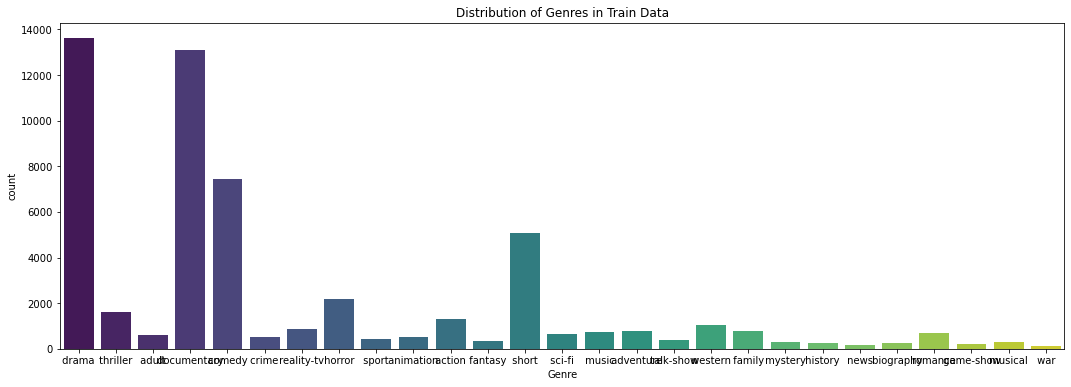

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of genres
plt.figure(figsize=(18, 6))
sns.countplot(x='Genre', data=train_data, palette='viridis')
plt.title('Distribution of Genres in Train Data')
plt.xlabel('Genre')
plt.ylabel


In [21]:
train_data['text'] = train_data['Title'] + ' ' + train_data['Description']
test_data['text'] = train_data['Title'] + ' ' + train_data['Description']


In [22]:
train_data

,Title,Genre,Description,text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,Oscar et la dame rose (2009) Listening in t...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,Cupid (1997) A brother and sister with a pa...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,"Young, Wild and Wonderful (1980) As the bus..."
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,The Secret Sin (1915) To help their unemplo...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,The Unrecovered (2007) The film's title ref...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,"""Bonino"" (1953) This short-lived NBC live s..."
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,Dead Girls Don't Cry (????) The NEXT Genera...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",Ronald Goedemondt: Ze bestaan echt (2008) Z...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,Make Your Own Bed (1944) Walter and Vivian ...


In [23]:
# # Take 25% of the rows
# train_data = train_data.samplea(frac=0.25, random_state=42)

In [24]:
train_data.shape

(54214, 4)

In [25]:
from nltk.corpus import stopwords
import re

STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase text
    text = text.lower()
    
    # Remove stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    # Remove all the special characters
    text = re.sub(r'\W', ' ', text)
    
    # Remove numbers
    text = re.sub(r'\d', ' ', text)
    
    # Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    
    # Substituting multiple spaces with single space
    text = re.sub(r'\s\s+', ' ', text) #remove extra spaces
    
    return text

In [26]:
train_data['cleaned_text'] = train_data['text'].apply(clean_text)

In [27]:
# test_data['cleaned_text'] = test_data['text'].apply(clean_text)

In [28]:
train_data['cleaned_text']

1        oscar et la dame rose listening conversation d...
2        cupid brother sister past incestuous relations...
3        young wild wonderful bus empties students fiel...
4        secret sin help unemployed father make ends me...
5        unrecovered film title refers un recovered bod...
                               ...                        
54210     bonino short lived nbc live sitcom centered b...
54211    dead girls cry next generation exploitation si...
54212    ronald goedemondt ze bestaan echt ze bestaan e...
54213    make bed walter vivian live country difficult ...
54214    nature fury storm century labor day weekend in...
Name: cleaned_text, Length: 54214, dtype: object

In [29]:
import nltk
from nltk.stem.porter import PorterStemmer

In [30]:
ps = PorterStemmer()

def stem(text):
    List = []
    
    for i in text.split(): # convert worlds into list and then stem each word
        List.append(ps.stem(i))
        
#     return List
    return ' '.join(List)

In [31]:
train_data['cleaned_text'] = train_data['cleaned_text'].apply(stem)

In [32]:
train_data['cleaned_text']

1        oscar et la dame rose listen convers doctor pa...
2        cupid brother sister past incestu relationship...
3        young wild wonder bu empti student field trip ...
4        secret sin help unemploy father make end meet ...
5        unrecov film titl refer un recov bodi ground z...
                               ...                        
54210    bonino short live nbc live sitcom center bonin...
54211    dead girl cri next gener exploit sister kapa b...
54212    ronald goedemondt ze bestaan echt ze bestaan e...
54213    make bed walter vivian live countri difficult ...
54214    natur furi storm centuri labor day weekend int...
Name: cleaned_text, Length: 54214, dtype: object

In [33]:
train_data.head()

,Title,Genre,Description,text,cleaned_text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,Oscar et la dame rose (2009) Listening in t...,oscar et la dame rose listen convers doctor pa...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,Cupid (1997) A brother and sister with a pa...,cupid brother sister past incestu relationship...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,"Young, Wild and Wonderful (1980) As the bus...",young wild wonder bu empti student field trip ...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,The Secret Sin (1915) To help their unemplo...,secret sin help unemploy father make end meet ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,The Unrecovered (2007) The film's title ref...,unrecov film titl refer un recov bodi ground z...


In [34]:
X = train_data['Genre']
Y = train_data['cleaned_text']

# TFidf Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data['cleaned_text'], 
                                                    train_data['Genre'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# RandomForest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49

Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        1.00      0.07      0.13       112
   adventure        0.57      0.09      0.15       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.28      0.37      1443
       crime        1.00      0.01      0.02       107
 documentary        0.54      0.89      0.67      2659
       drama        0.42      0.84      0.56      2697
      family        0.67      0.01      0.03       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.25      0.40        40
     history        0.00      0.00      0.00        45
      horror        0.79      0.14      0.23       431
       music        0.71      0.10      0.18       144
     musical        0.00      0.00      0.00        50
     mystery        0.00 

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
